In [1]:
using Pkg
Pkg.add("Latexify");
Pkg.add("LaTeXStrings");
Pkg.add("LinearAlgebra");
Pkg.add("JuMP");
Pkg.add("Clp");
Pkg.add("PyPlot");
Pkg.add("NamedArrays")
Pkg.add("CSV");
Pkg.add("DataFrames");
Pkg.add("Ipopt");

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.t

In [4]:
println("Homework 5 - Jacob Lorenz")

Homework 5 - Jacob Lorenz


# Problem 1 - Voltage Smoothing

**We would like to send a sequence of voltage inputs to the manipulator arm of a robot. The desired signal can be found in the homework writeup or in voltage.csv.**

**Unfortunately, abrupt changes in voltage can cause undue wear and tear on the motors over time, so we would like to create a new signal that is similar to the one provided but with smoother transitions. If the voltages are given by $v_1, V_2, ..., v_200$, one way to characterize smoothness is via the sum of squared differences:**

$$
    R(v) = (v_2 - v_1)^2 + (v_3 - v_2)^2 + \dots + (v_{200} - v_{199})^2
$$

**When $R(v)$ is smaller, the voltage is smoother. Solve a regularized least squares problem that explores the tradeoff between matching the desired signal perfectly and making the signal smooth. Include a plot comparing the original signal to a few different smoothed versions obtained using regularized least squares and with varying degrees of smoothness.**

This problem is very straightforward. There are actually no constraints. We just need to define expressions for the Regularizer function and the L2Norm, and then explore the tradeoff between optimums when we adjust the regularization parameter.

In [39]:
using CSV, DataFrames
using PyPlot, JuMP, Gurobi

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

In [42]:
function solveVoltageRegulariedLeastSquares(λ)

    model = Model(Gurobi.Optimizer)
    @variable(model, v[1:200]); # Variables for the voltage at each time
    @expression(model, Regularizer, sum(((v[i+1] - v[i])^2) for i in 1:199)) # Define the regularizer function
    @expression(model, L2Norm, sum(((v[i] - vtarget[i])^2) for i in 1:200)) # Define the L2 norm function
    
    @objective(model, Min, L2Norm + λ * Regularizer) # Objective is to minimize the tradeoff depending on λ
    optimize!(model);

    V1 = value.(v)
    
    return(V1)
end

solveVoltageRegulariedLeastSquares (generic function with 1 method)

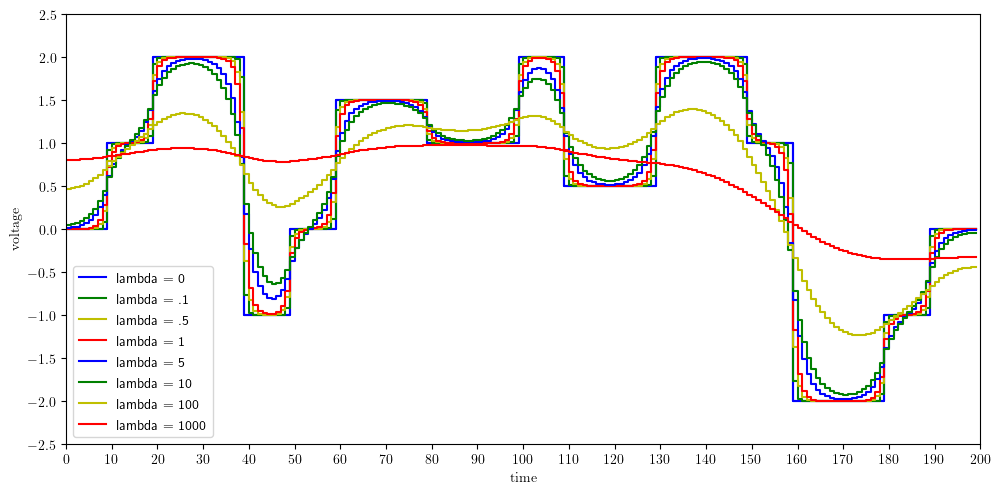

Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 0 rows, 200 columns and 0 nonzeros
Model fingerprint: 0xfaeacdeb
Model has 200 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+00, 4e+00]
  QObjective range [2e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 0 rows and 200 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Barrier solved model in 0 iterations and 0.00 seconds
Optimal objective 0.00000000e+00

User-callback calls 20, time in user-callback 0.00 sec
Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 0 rows, 200

PyObject <matplotlib.legend.Legend object at 0x7f89ca2e9580>

In [82]:
## Starter code for question 2

# PyPlot.svg(false)
# Use Latex for nice-looking axis titles
PyPlot.rc("text", usetex=true)
# Create a figure
figure(figsize=(10, 5))
# Set the limit to axes
axis([0, 200, -2.5, 2.5])
xlabel(L"\textrm{time}")
ylabel(L"\textrm{voltage}")
PyPlot.tight_layout()

# set ticks
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](.5)
ax[:yaxis][:set_major_locator](my)

# plot the target voltages
step(vtarget,"b-")

lambdaValues = [0, .1, .5, 1, 5, 10, 100, 1000];

smoothedVoltages_1 = solveVoltageRegulariedLeastSquares(lambdaValues[1])
smoothedVoltages_2 = solveVoltageRegulariedLeastSquares(lambdaValues[2])
smoothedVoltages_3 = solveVoltageRegulariedLeastSquares(lambdaValues[3])
smoothedVoltages_4 = solveVoltageRegulariedLeastSquares(lambdaValues[4])
smoothedVoltages_5 = solveVoltageRegulariedLeastSquares(lambdaValues[5])
smoothedVoltages_6 = solveVoltageRegulariedLeastSquares(lambdaValues[6])
smoothedVoltages_7 = solveVoltageRegulariedLeastSquares(lambdaValues[7])
smoothedVoltages_8 = solveVoltageRegulariedLeastSquares(lambdaValues[8])

# Add plots for each of the various values of λ
step(smoothedVoltages_1,"b-", label = "lambda = 0") # λ = 0 
step(smoothedVoltages_2,"g-", label = "lambda = .1") # λ = .1
step(smoothedVoltages_3,"y-", label = "lambda = .5") # λ = .5
step(smoothedVoltages_4,"r-", label = "lambda = 1") # λ = 1
step(smoothedVoltages_5,"b-", label = "lambda = 5") # λ = 5
step(smoothedVoltages_6,"g-", label = "lambda = 10") # λ = 10
step(smoothedVoltages_7,"y-", label = "lambda = 100") # λ = 100
step(smoothedVoltages_8,"r-", label = "lambda = 1000") # λ = 1000

legend(loc = "lower left")

In the plot above, we compare the optimal voltage signal sequence with λ values in $[0, .1, .5, 1, 5, 10, 100, 1000]$. Although the interpretation is sort of arbitrary, to me it seems that any value of λ $\leq 1$ essentially produces a very close signal sequence to the original, unsmoothed sequence. With a λ = 0 parameter, we get the exact same signal sequence.

The queston now becomes which threshold would we actually use? What is "close enough" that we are satisfied with the accuracy while also properly protecting the equipment? Surely a λ = 1000 parameter is too smooth, as we lose a lot of the characteristics of the sequence. λ = 100 isn't too bad, but it does skip a lot of the peaks and valleys. Perhaps a curve such as that obtained with λ = 10 would suffice, as it tends to go to the peaks and valleys while maintaining a consistently smooth curve throughout the sequence. All interesting cases to consider if more information or requirements were available.

# Problem 2 - Spline Fitting

**We are running a series of experiments to evaluate the properties of a new fluorescent material. As we vary the intensity of the incident light, the material should fluoresce different amounts. Unfortunately, the material isn’t perfectly uniform and our method for measuring fluorescence is not very accurate. After testing 200 different intensities, we obtained the result below (also available in xy_data.csv). The intensities $x_i$ and fluorescences $y_i$ are recorded in the first and second columns of the data matrix, respectively.**

**The material has interesting nonlinear properties, and we would like to characterize the relationship between intensity and fluorescence by using an approximate model that agrees well with the trend of our experimental data. Although there is noise in the data, we know from physics that the fluorescence must be zero when the intensity is zero. This fact must be reflected in all of our models!**

**a) Polynomial Fit. Find the best cubic polynomial fit to the data. In other words, look for a function of the form $y = a_1x^3 + a_2x^2 + a_3x + a_4$ that has the best possible agreement with the data. Remember that the model should have exactly zero fluorescence when the intensity is zero! Include a plot of the data along with your best-fit cubic on the same axes.**

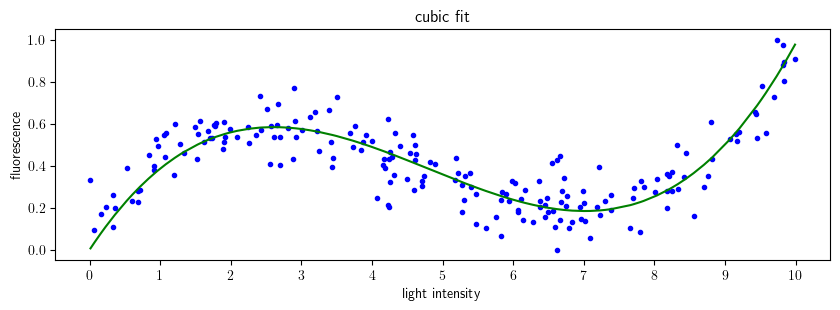

Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 1 rows, 4 columns and 1 nonzeros
Model fingerprint: 0xff1f2412
Model has 10 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 4e+04]
  QObjective range [4e+02, 5e+07]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 0 rows, 3 columns, 0 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 5
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94279440e+01  3.

In [106]:
using JuMP, Gurobi
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

# Fit the data using a function of the form y = f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
function determineBestFitPolynomial(k)
    m = Model(Gurobi.Optimizer)
    @variable(m, a[1:k+1]); # Declare variables for each coefficient 1:k+1
    
    @constraint(m, a[k+1] == 0) # Make sure that the intercept is 0 since intensity = 0 => fluorescence = 0
    
    # We want to minimize the error between cubic and actual ^ 2
    @expression(m, Error, sum(((a[1]*x[i]^3 + a[2] * x[i]^2 + a[3] * x[i] + a[4]) - y[i]).^2 for i in 1:size(x,1)));
    @objective(m, Min, Error)
    optimize!(m)
    aopt = value.(a)
    
    return (aopt);
end

# plot the points
plotpoints()

k = 3;
(aOpt) = determineBestFitPolynomial(k);

xVals = A[:,1];
yVals = aOpt[1] * xVals.^3 + aOpt[2] * xVals.^2 + aOpt[3] * xVals.^1 .+ aOpt[4];
plot(xVals, yVals, "g-")
title("cubic fit")

println("Best-Fitting Cubic Polynomial: ", aOpt[1], "x^3 + ", aOpt[2], "x^2 + ", aOpt[3], "x + ", aOpt[4]);


**From the results above, we see that the best fitting cubic polynomial is:**

$$
    y_i = 0.009325012602116229x_i^3 - 0.13454611815267248x_i^2 + 0.5111547756869761x_i + 0
$$

**This cubic polynomial results in a minimized squared error (objective) of 1.8806613.**

**b) Spline Fit. Instead of using a single cubic polynomial, we will look for a fit to the data using two quadratic polynomials. Specifically, we want to find coefficients $p_i$ and $q_i$ such that our data is well modeled by the piecewise quadratic function:**

$$
    y = p_1x^2 + p_2x + p_3 \;\;\; \text{if} \quad 0 \leq x \lt 4 \\
    y = q_1x^2 + q_2x + q_3 \;\;\; \text{if} \quad 4 \leq x \lt 10
$$

**These quadratic functions must be designed so that:**
- As in the cubic model, there is zero fluorescence when the intensity is zero
- Both quadratic pieces have the same value at $x=4$
- Both quadratic pieces have the same slope at $x=4$

**In other words, we are looking for a smooth piecewise quadratic. This is also known as a spline (this is just one type of spline, there are many other types). Include a plot of the data along with your best-fit model.**

This solution is rather similar to the solution from above in part a), except that we need to consider two different subsets of the data individually. One tricky part of this problem was how to combine the minimizations depending on the value of $x_i$. Now, I'm sure there is a way using some sort of conditional expressions to build the objective from; however, I went with some mathematical manipulation instead and am satisfied that it does the job. Specifically, I was looking for 2 expressions. One that would equate to 1 any time $x_i \lt 4$ and 0 any time $4 \leq x_i \lt 10$. The other needed to do the opposite, equate to 0 any time $x_i \lt 4$ and 1 any time $4 \leq x_i \lt 10$.

The expressions I came up with are then multipliers that act as indicator functions to determine which quadratic expression to apply for that value of $x_i$ in the objective function.

Specifically, the model in this case is then:

$$
    \min_{p_1,p_2,p_3,q_1,q_2,q_3} \;\; \sum_{i = 1}^{200}{((1-(((x_i + 4) - ((x_i + 4) \% 8)) / 8)) * (p_1*x_i^2 + p_2*x_i + p_3 - y_i)^2) + (((x_i + 4) - ((x_i + 4) \% 8)) / 8) * (q_1*x_i^2 + q_2*x_i + q_3 - y_i)^2)} \\
    \text{subject to:} \\
    p_3 = 0 \\
    16*p_1 + 4*p_2 + p_3 = 16*q_1 + 4*q_2 + q_3 \\
    8*p_1 + p_2 = 8*q_1 + q_2
$$

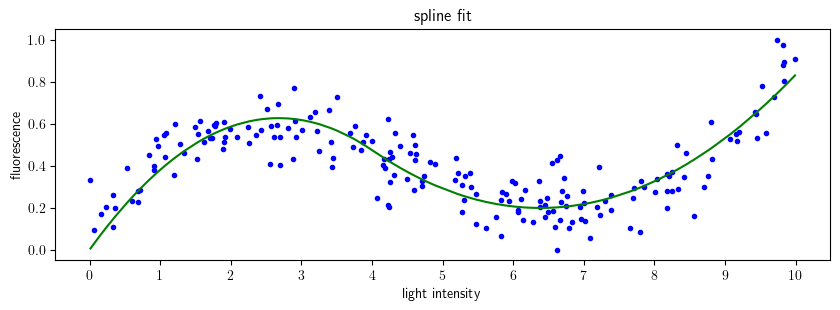

Academic license - for non-commercial use only - expires 2021-05-01
Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (mac64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 3 rows, 6 columns and 11 nonzeros
Model fingerprint: 0x5904a0f0
Model has 12 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [7e+01, 5e+03]
  QObjective range [2e+02, 7e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 1 columns
Presolve time: 0.00s
Presolved: 2 rows, 5 columns, 9 nonzeros
Presolved model has 9 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 8
 AA' NZ     : 8.000e+00
 Factor NZ  : 1.500e+01
 Factor Ops : 5.500e+01 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.94279440e+01  3

In [105]:
#### using JuMP, Gurobi
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

# Fit the data using a function of the form y = f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
function determineBestFitSpline(k)
    m = Model(Gurobi.Optimizer)
    @variable(m, p[1:k+1]); # Declare variables for each coefficient 1:k+1
    @variable(m, q[1:k+1]); # Declare variables for each coefficient 1:k+1
    
    @constraint(m, p[k+1] == 0) # Make sure that the intercept of first quadratic is 0 since intensity = 0 => fluorescence = 0
    @constraint(m, p[1]*16 + p[2]*4 + p[3] == q[1]*16 + q[2]*4 + q[3]) # Ensure the values at x = 4 are same
    @constraint(m, p[1]*8 + p[2] == q[1]*8 + q[2]) # Ensure the slopes at x = 4 are same
    
    @expression(m, TotalError, 
        sum(((1-(((x[i] + 4) - ((x[i] + 4) % 8)) / 8)) * (p[1]*x[i]^2 + p[2]*x[i] + p[3] - y[i])^2) +
            ((((x[i] + 4) - ((x[i] + 4) % 8)) / 8) * (q[1]*x[i]^2 + q[2]*x[i] + q[3] - y[i])^2)
            for i in 1:size(x,1)));
    
    @objective(m, Min, TotalError)
    optimize!(m)
    popt = value.(p)
    qopt = value.(q)
    
    return (popt, qopt);
end

# plot the points
plotpoints()

k = 2;
(pOpt, qOpt) = determineBestFitSpline(k);

xVals = A[:,1];
yVals = zeros(size(xVals,1))
for i in 1:size(xVals,1)
    if (xVals[i] < 4)
        yVals[i] = pOpt[1]*x[i]^2 + pOpt[2]*x[i] + pOpt[3]
    else
        yVals[i] = qOpt[1]*x[i]^2 + qOpt[2]*x[i] + qOpt[3]
    end
end

plot(xVals, yVals, "g-")

title("spline fit")

println("Best-Fitting Quadratic Polynomial for x < 4: ", pOpt[1], "x^2 + ", pOpt[2], "x + ", pOpt[3]);
println("Best-Fitting Quadratic Polynomial for 4 <= x <= 10: ", qOpt[1], "x^2 + ", qOpt[2], "x + ", qOpt[3]);

**From the results above, we see that the best fitting spline is:**

$$
    y_i = -0.08732605915558704x_i^2 + 0.4676820392233096x_i + 0 \;\;\; \text{if} \quad 0 \leq x_i \lt 4 \\
    y_i = 0.04846826704745515x_i^2 - 0.6186725704009569x_i + 2.172709219248353 \;\;\; \text{if} \quad 4 \leq x_i \lt 10
$$

**This spline curve results in a minimized squared error (objective) of 2.05841511.**

# Problem 3 - Hovercraft Rendezvous

**Alice and Bob are cruising on Lake Mendota in their hovercrafts. Each hovercraft has the following dynamics:**

$$
    \text{Dyanmics of each Hovercraft:} \\
    x_{t+1} = x_t + \frac{1}{3600}v_t \\
    v_{t+1} = v_t + u_t
$$

**At time $t$ (seconds), $x_t \in \mathcal{R}^2$ is the position (in miles), $v_t \in \mathcal{R}^2$ is the velocity (in miles per hour), and $u_t \in \mathcal{R}^2$ is the thrust in normalized units. At $t = 1$, Alice has a speed of 20 mph going North, and Bob is located half a mile East of Alice, moving due East at 30 mph. Alice and Bob would like to rendezvous at exactly $t = 60$ seconds. The location where they meet is up to you.**

**a) Find the sequence of thruster inputs for Alice $(u^A)$ and Bob $(u^B)$ that achieves a rendezvous at $t = 60$ while minimizing total energy used by both hovercraft:**

$$
    \text{total energy} = \sum_{t=1}^{60} ||u^A_t||^2 + \sum_{t=1}^{60} ||u^B_t||^2
$$

**Plot the trajectories of each overcraft to verify that they do indeed rendezvous.**

Although from the outset this may seem like a difficult problem to solve, as we have seen in lecture, it is actually rather straightforward with the help of a solver. All we need to do is program the simulated physics and specify particular positions we would like Bob and Alice to be in during a given time. Specifically, the mathemiatical model of this problem is:

Let $x_t$, $v_t$, and $u_t$ represent the position, velocity, and acceleration, respectively, of ALice at time $t = [1,60]$. Let $y_t$, $w_t$, and $z_t$ represent the position, velocity, and acceleration, respectively, of Bob at time $t = [1,60]$. Then, we have the following problem:

$$
    minimize \sum_{t = 1}^{60}{||u_t||^2} + \sum_{t = 1}^{60}{||z_t||^2} \\
    \text{subject to:} \\
    x_{t+1} = x_t + \frac{1}{3600} v_t \\
    y_{t+1} = y_t + \frac{1}{3600} w_t \\
    v_{t+1} = v_t + u_t \\
    w_{t+1} = w_t + z_t \\
    x_1 = [0,0] \\
    y_1 = [0.5,0] \\
    v_1 = [0,20] \\
    w_1 = [30,0] \\
    x_{60} = y_{60}
$$

With our model defined, we can now solve

In [23]:
using JuMP, Ipopt

# Note: Much of the following code was derived from Hovercraft.ipynb and 
# refactored to fit the nuances of this particular problem.

RT =  60;

function solveOpt()
    m = Model(Ipopt.Optimizer)
    
    @variable(m, x[1:2, 1:RT]) # Alice Position
    @variable(m, y[1:2, 1:RT]) # Bob Position
    @variable(m, v[1:2, 1:RT]) # Alice Velocity
    @variable(m, w[1:2, 1:RT]) # Bob Velocity
    @variable(m, u[1:2, 1:RT]) # Alice Accelleration
    @variable(m, z[1:2, 1:RT]) # Bob Accelleration
    
    # make the solution periodic!
    #@constraint(m, x[:,1] .== x[:,T[k]])
    #@constraint(m, y[:,1] .== y[:,T[k]])
    #@constraint(m, v[:,1] .== v[:,T[k]])
    #@constraint(m, w[:,1] .== w[:,T[k]])
    
    # Satisfy the dynamics with initial values
    @constraint(m, x[:,1] .== [0;0])
    @constraint(m, y[:,1] .== [0.5;0])
    @constraint(m, v[:,1] .== [0;20])
    @constraint(m, w[:,1] .== [30;0])
    
    for t in 1:RT-1
        @constraint(m, x[:,t+1] .== x[:,t] + (v[:,t] / 3600))
        @constraint(m, y[:,t+1] .== y[:,t] + (w[:,t] / 3600))
        @constraint(m, v[:,t+1] .== v[:,t] + u[:,t])
        @constraint(m, w[:,t+1] .== w[:,t] + z[:,t])
    end
    
    # Rendezvous
    @constraint(m, x[:,60] .== y[:,60])
    
    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(u.^2) + sum(z.^2) )
    
    optimize!(m)
    
    J1 = value.(sum(u.^2))
    J2 = value.(sum(z.^2))
    xopt = value.(x)
    yopt = value.(y)
    obj = objective_value(m);
    
    return (J1,J2,xopt,yopt,obj)
end

solveOpt (generic function with 1 method)

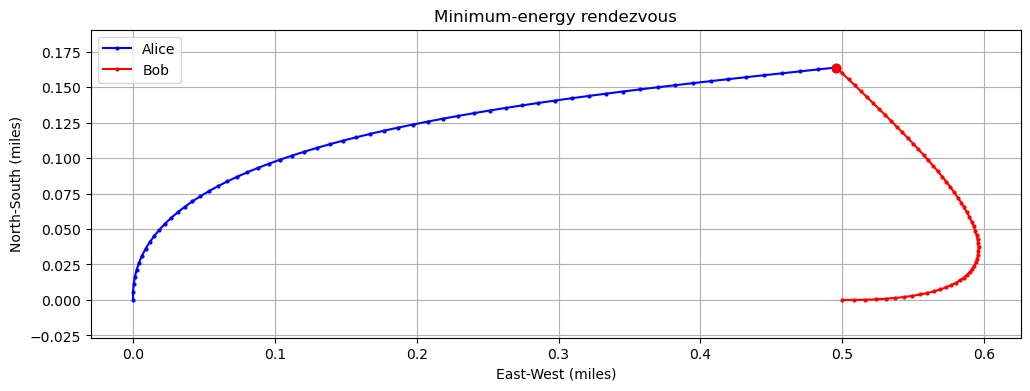

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1428
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      482
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [29]:
(J1x,J2x,x,y,obj) = solveOpt();

using PyPlot
figure(figsize=(12,4))
plot( x[1,:], x[2,:], "b.-", markersize=4, label = "Alice")
plot( x[1,RT], x[2,RT], "b.", markersize=12 )
plot( y[1,:], y[2,:], "r.-", markersize=4, label = "Bob")
plot( y[1,RT], y[2,RT], "r.", markersize=12 )


axis((-0.2,0.75,-0.2,0.4));
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

println("Final Position of Alice: ", x[:,60]);
println("Final Position of Bob: ", y[:,60]);
println("Minimal Thrust: ", obj);

As we can see from the results directly above, Alice and Bob were able to successfully rendezvous at a position of (0.495833, 0.163888) miles away from the origin (Alice's Location). The total energy usage came to 105.9307 units.

**b) In addition to arriving at the same place at the same time, Alice and Bob would like to make sure their velocity vectors match when they rendezvous (otherwise they might crash!). Solve the problem again with the additional velocity matching constraint and plot the resulting trajectories. Is the optimal rendezvous location different from the one found in part a)?**

The modifications to this problem is minor. We simply add one more equality constraint to the model to demand that the velocitiy vectors are equal at rendezvous.

In [31]:
using JuMP, Ipopt

# Note: Much of the following code was derived from Hovercraft.ipynb and 
# refactored to fit the nuances of this particular problem.

RT =  60;

function solveOpt2()
    m = Model(Ipopt.Optimizer)
    
    @variable(m, x[1:2, 1:RT]) # Alice Position
    @variable(m, y[1:2, 1:RT]) # Bob Position
    @variable(m, v[1:2, 1:RT]) # Alice Velocity
    @variable(m, w[1:2, 1:RT]) # Bob Velocity
    @variable(m, u[1:2, 1:RT]) # Alice Accelleration
    @variable(m, z[1:2, 1:RT]) # Bob Accelleration
    
    # make the solution periodic!
    #@constraint(m, x[:,1] .== x[:,T[k]])
    #@constraint(m, y[:,1] .== y[:,T[k]])
    #@constraint(m, v[:,1] .== v[:,T[k]])
    #@constraint(m, w[:,1] .== w[:,T[k]])
    
    # Satisfy the dynamics with initial values
    @constraint(m, x[:,1] .== [0;0])
    @constraint(m, y[:,1] .== [0.5;0])
    @constraint(m, v[:,1] .== [0;20])
    @constraint(m, w[:,1] .== [30;0])
    
    for t in 1:RT-1
        @constraint(m, x[:,t+1] .== x[:,t] + (v[:,t] / 3600))
        @constraint(m, y[:,t+1] .== y[:,t] + (w[:,t] / 3600))
        @constraint(m, v[:,t+1] .== v[:,t] + u[:,t])
        @constraint(m, w[:,t+1] .== w[:,t] + z[:,t])
    end
    
    # Rendezvous
    @constraint(m, x[:,60] .== y[:,60])
    @constraint(m, v[:,60] .== w[:,60]);
    
    # minimize 2-norm (THIS IS LEAST-SQUARES)
    @objective(m, Min, sum(u.^2) + sum(z.^2) )
    
    optimize!(m)
    
    J1 = value.(sum(u.^2))
    J2 = value.(sum(z.^2))
    xopt = value.(x)
    yopt = value.(y)
    obj = objective_value(m);
    
    return (J1,J2,xopt,yopt,obj)
end

solveOpt2 (generic function with 1 method)

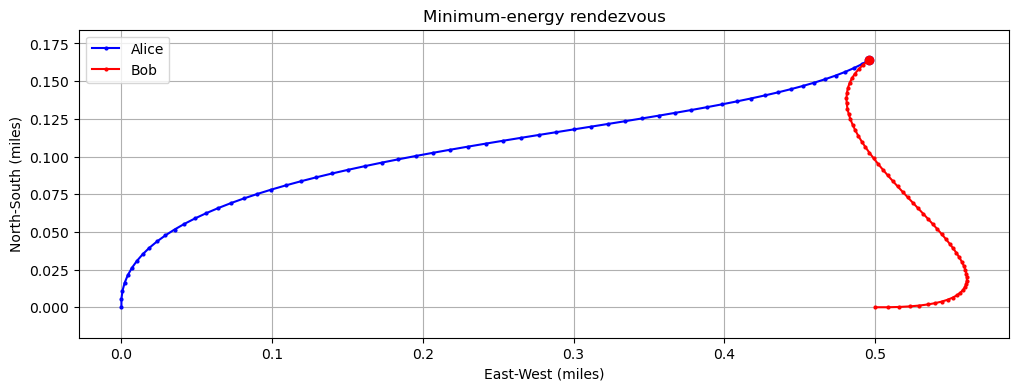

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     1432
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      240

Total number of variables............................:      720
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      484
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

In [33]:
(J1x,J2x,x,y,obj) = solveOpt2();

using PyPlot
figure(figsize=(12,4))
plot( x[1,:], x[2,:], "b.-", markersize=4, label = "Alice")
plot( x[1,RT], x[2,RT], "b.", markersize=12 )
plot( y[1,:], y[2,:], "r.-", markersize=4, label = "Bob")
plot( y[1,RT], y[2,RT], "r.", markersize=12 )


axis((-0.2,0.75,-0.2,0.4));
xlabel("East-West (miles)")
ylabel("North-South (miles)")
legend(loc = "upper left")
grid()
axis("equal")
title("Minimum-energy rendezvous");

println("Final Position of Alice: ", x[:,60]);
println("Final Position of Bob: ", y[:,60]);
println("Minimal Thrust: ", obj);

As we can see from the results directly above, Alice and Bob were able to successfully rendezvous again at a position of (0.495833, 0.163888) miles away from the origin (Alice's Location) while achieving the same ultimate velocity. The total energy usage came to 234.5704 units.